## What's up guys????

This is Nipun Jagtap, back with another project on data anlaysis, which is completely based on application of machine learning models to analyse and quintessentially obtain the insights of the received disaster data.
Although we know it is the most emotional accident of 1990's, without failing let's focus on the major impacting factors for all unsurvived people and find the best fitted machine learning model to predict the accurate survival of person.

We will look at conducting the data analysis in this manner:
1. Import data
2. Get the info of data
3. Pre-process the data
4. Apply the Machine Learning models
5. Validate the test data and get the accuracy levels
6. Concluding with the best obtained results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame as df # OM: Not a good practice
%matplotlib inline


In [2]:
#import data
train_df = df(pd.read_csv('train.csv'))
test_df = df(pd.read_csv('test.csv'))
GS_df = df(pd.read_csv('gender_submission.csv'))

In [3]:
#train_df.info()
#train_df.isnull().sum()

In [4]:
#test_df.info()
#test_df.isnull().sum()

In [5]:
#GS_df.head()

In [6]:
# Merge test data and gender submission data

test_df = pd.merge(test_df, GS_df, on = 'PassengerId', how = 'left')
#test_df.info()
print(test_df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64


In [7]:
#test_df.head()

In [8]:
# Extracting the prefix of all the passenger names 

train_df['Title'] = train_df.Name.str.extract('([A-Za-z]+)\.', expand=False)
#train_df[train_df['Age'] == 0].groupby(train_df['Pclass'])['Title'].value_counts()
#train_df['Title']

In [9]:
test_df['Title'] = test_df.Name.str.extract('([A-Za-z]+)\.', expand=False)
#train_df[train_df['Age'] == 0].groupby(train_df['Pclass'])['Title'].value_counts()
#test_df['Title']

In [10]:
train_df['Age'].fillna(0, inplace = True)
test_df['Age'].fillna(0, inplace = True)

In [11]:
#print(train_df[train_df['Age'] == 0].groupby(train_df['Pclass'])['Title'].value_counts())

In [12]:
# Pre-processing data by removing the 'Nan' values from data

# Looking at the above table, we have put condition for the specific passenger class and segregated them to give the mean age designation wise.

# For train dataset
table_train_df = pd.DataFrame(columns= ['pclass', 'title', 'mean_age'])
for x in range(1,train_df.Pclass.nunique()+1): 
    if x == 1:
        y_list = ['Mr', 'Mrs', 'Dr', 'Miss']
    elif x==2:
        y_list = ['Mr', 'Miss']
    else:
        y_list = ['Mr', 'Miss', 'Mrs', 'Master']

    for y in y_list:
        z = train_df[(train_df['Pclass'] == x).any() and (train_df['Title'] == y)]['Age'].mean()
        table_train_df = table_train_df.append({'pclass': x, 'title': y, 'mean_age': round(z)}, ignore_index = True)
        #print(x, y, round(z))
        
table_train_df

,pclass,title,mean_age
0,1,Mr,25
1,1,Mrs,31
2,1,Dr,36
3,1,Miss,17
4,2,Mr,25
5,2,Miss,17
6,3,Mr,25
7,3,Miss,17
8,3,Mrs,31
9,3,Master,4


In [13]:
#test_df.Title.value_counts()

In [16]:
# Similarly for test dataset

table_test_df = pd.DataFrame(columns = ['pclass', 'title', 'mean_age'])
for x in range(1,test_df.Pclass.nunique()+1): 
    if x == 1:
        y_list = ['Mr', 'Mrs']
    elif x==2:
        y_list = ['Mr']
    else:
        y_list = ['Mr', 'Miss', 'Mrs', 'Master', 'Ms']

    for y in y_list:
        z = test_df[(test_df['Pclass'] == x).any() and (test_df['Title'] == y)]['Age'].mean()
        table_test_df = table_test_df.append({'pclass': x, 'title': y, 'mean_age': round(z)}, ignore_index = True)

table_test_df

,pclass,title,mean_age
0,1,Mr,24
1,1,Mrs,34
2,2,Mr,24
3,3,Mr,24
4,3,Miss,18
5,3,Mrs,34
6,3,Master,6
7,3,Ms,0


In [37]:
# Removing nulls from train dataset

for i in range(len(train_df)):
    if train_df['Age'][i] == 0.0:
        title = train_df['Title'][i]
        pclass = train_df['Pclass'][i]           

        train_df['Age'][i] = int(table_train_df[(table_train_df['title'] == title) & (table_train_df['pclass'] == pclass)]['mean_age'])

In [47]:
# Removing nulls from test dataset
for j in range(len(test_df)):
    if test_df['Age'][j] == 0.0:
        title = test_df['Title'][j]
        pclass = test_df['Pclass'][j]
        
        test_df['Age'][j] = float(table_test_df[(table_test_df['title'] == title) & (table_test_df['pclass'] == pclass)]['mean_age'])

In [48]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null object
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Survived       418 non-null int64
Title          418 non-null object
dtypes: float64(1), int64(5), object(7)
memory usage: 65.7+ KB


In [46]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null object
AgeGroup       891 non-null category
dtypes: category(1), float64(2), int64(5), object(6)
memory usage: 91.8+ KB


In [30]:
#print(test_df[test_df['Age'] == 0].groupby(test_df['Pclass'])['Title'].value_counts())

## **Relating and finding the impactful factors for the survival of people**

In [44]:
#1) Corelating with Age Group

bins = [-2, 0, 3, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Kids', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train_df['AgeGroup'] = pd.cut(train_df["Age"], bins, labels = labels)
test_df['AgeGroup'] = pd.cut(test_df["Age"], bins, labels = labels)
q = (train_df[train_df['Survived'] == 1].AgeGroup.value_counts())
q

AttributeError: 'Series' object has no attribute 'float'

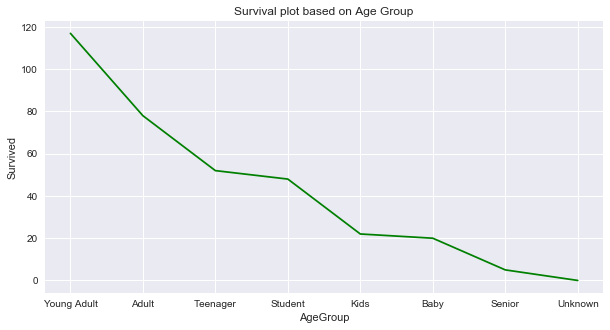

In [21]:
fig, ax = plt.subplots(1, figsize = (10,5))
ax.plot(np.arange(len(labels)), q[0:8], color = 'green')
plt.xticks(np.arange(len(labels)), p.index.values)
plt.ylabel('Survived')
plt.xlabel('AgeGroup')
plt.title('Survival plot based on Age Group')
plt.show()

In [22]:
#2) Corelating with Passenger Class

pclass_srv = train_df[train_df['Survived'] ==1].groupby(train_df['Pclass']).sum()
pclass_srv

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Pclass,,,,,,,
1,66881,136,136,4704.92,67,53,13002.6919
2,38200,87,174,2233.83,43,56,1918.8459
3,46893,119,357,2446.92,52,50,1629.6916


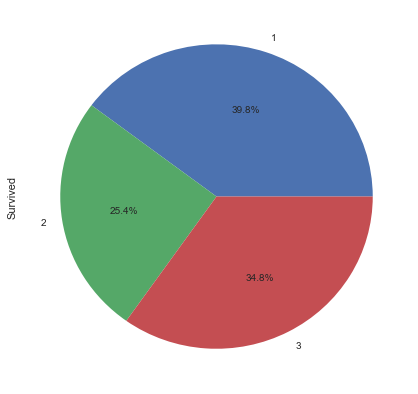

In [23]:
# Visualisation of above data

c = pclass_srv.iloc[0:3, 1]
plt.figure(1, figsize=(7,7))
c.plot.pie(autopct="%1.1f%%")
plt.show()

In [24]:
#3) Finding the survival's ticket fare

Surv_avgfare = train_df.groupby(train_df['Survived'])['Fare'].aggregate(['min', 'mean', 'max'])
#Surv_avgfare

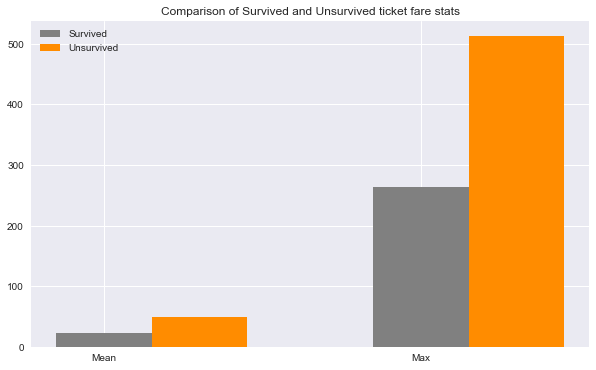

In [25]:
#Visualisation

surv_df = Surv_avgfare.iloc[0, 1:]
unsurv_df = Surv_avgfare.iloc[1, 1:]
fig, ax = plt.subplots(1, figsize = (10, 6))
x = np.arange(2)
width = 0.3
var = ['Mean', 'Max']

a = ax.bar(x, surv_df, width, color = 'grey')
b = ax.bar(x+width, unsurv_df, width, color = 'darkorange')
plt.xticks(x, var)
plt.title('Comparison of Survived and Unsurvived ticket fare stats')
plt.legend((a[0], b[0]), ('Survived', 'Unsurvived'))
plt.show()

In [26]:
#4) Finding the corelation with the number of siblings or spouse

Sibsp = train_df.groupby('SibSp')['Survived'].sum()
#Sibsp.tail(8)

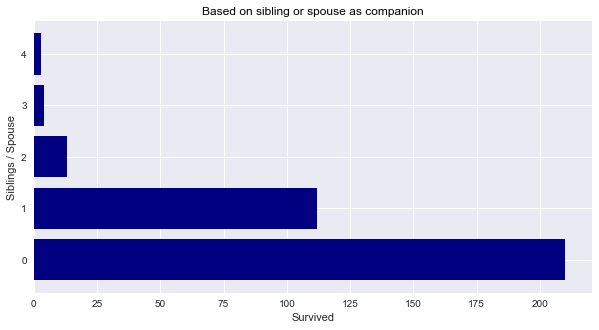

In [27]:
fig, ax = plt.subplots(1, figsize=(10, 5))
n_SibSp = ['0', '1', '2', '3', '4']
ax.barh(np.arange(len(n_SibSp)), Sibsp[0:5], color = 'navy') 
plt.yticks(np.arange(len(n_SibSp)), n_SibSp)
plt.xlabel('Survived')
plt.ylabel('Siblings / Spouse')
plt.title('Based on sibling or spouse as companion', color = 'Black')
plt.show()

In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null object
AgeGroup       891 non-null category
dtypes: category(1), float64(2), int64(5), object(6)
memory usage: 91.8+ KB


In [29]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,AgeGroup
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,Mr,Young Adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,Mrs,Adult
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,Mr,Senior
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,Mr,Young Adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,Mrs,Student


# Applying machine learning models on the following dataset 

In [30]:
#Cut the data to important columns

train = train_df.drop(['Name', 'Parch', 'Ticket', 'Embarked', 'Cabin', 'Title', 'AgeGroup'], axis = 1)
test = test_df.drop(['Name', 'Parch', 'Ticket', 'Embarked', 'Cabin', 'AgeGroup'], axis = 1)

In [33]:
# Setting the variables 

train_X = train.iloc[:, 2:7].values
train_Y = train.iloc[:, 1].values

test_X = test.iloc[:, 1:6].values
test_Y = test.iloc[:, 6].values

In [37]:
test_X

array([[3, 'male', 34.5, 0, 7.8292],
       [3, 'female', 47.0, 1, 7.0],
       [2, 'male', 62.0, 0, 9.6875],
       ..., 
       [3, 'male', 38.5, 0, 7.25],
       [3, 'male', 0.0, 0, 8.05],
       [3, 'male', 0.0, 1, 22.3583]], dtype=object)

In [38]:
train_X

array([[3, 'male', 22.0, 1, 7.25],
       [1, 'female', 38.0, 1, 71.2833],
       [3, 'female', 26.0, 0, 7.925],
       ..., 
       [3, 'female', 17.0, 1, 23.45],
       [1, 'male', 26.0, 0, 30.0],
       [3, 'male', 32.0, 0, 7.75]], dtype=object)

In [39]:
# Pre-processing the data

# Since no categorical variable is allowed in the variable set of the machine learning model, lets convert the 'Sex' variable into numerical variable.

# Encoding Independent variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
train_X[:, 1] = labelencoder_X.fit_transform(train_X[:, 1])
test_X[:, 1] = labelencoder_X.fit_transform(test_X[:, 1])


In [41]:
test_X

array([[3, 1, 34.5, 0, 7.8292],
       [3, 0, 47.0, 1, 7.0],
       [2, 1, 62.0, 0, 9.6875],
       ..., 
       [3, 1, 38.5, 0, 7.25],
       [3, 1, 0.0, 0, 8.05],
       [3, 1, 0.0, 1, 22.3583]], dtype=object)

In [42]:
# Scaling of variables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
train_X = sc_X.fit_transform(train_X)
test_X = sc_X.transform(test_X)
sc_y = StandardScaler()

C:\Users\Toma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Above cell will run properly once the NaN in test data is also removed

In [254]:
#train_X

### 1) Multiple regression model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_X, train_Y)

#Predicting the Test set results
pred_Y1 = regressor.predict(test_X)

#Building the optimal model using Backward Elimination method
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((50,1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_OLS.summary()
#X_opt = X[:, [0, 1, 2, 3, 5]]
regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_OLS.summary()

In [ ]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm_1 = confusion_matrix(test_Y, pred_Y1)

#ROC calculations
sens_1 = cm_1[1, 1]/(cm_1[1, 1] + cm_1[1, 0])
spec_1 = cm_1[0, 0]/(cm_1[0, 0] + cm_1[0, 1])
precs_1 = cm_1[1, 1]/(cm_1[1, 1] + cm_1[0, 1])
t_1 = 1-spec_1

#Visualisation
plt.scatter(test_X, test_Y, color = 'pink')
plt.plot(test_X, pred_Y1, color = 'blue')

#Another curve for ROC
plt.plot(t_1, sens_1, style = '-', color = 'orange')
plt.plot(t_1, t_1, style = '--')

## 2) Logistics regression model

In [ ]:
# Fitting logistics regression to training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(train_X, train_Y)

# Predicting test results
pred_Y2 = classifier.predict(test_X)

# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm_2 = confusion_matrix(test_Y, pred_Y2)

#ROC calculations
sens_1 = cm_1[1, 1]/(cm_1[1, 1] + cm_1[1, 0])
spec_1 = cm_1[0, 0]/(cm_1[0, 0] + cm_1[0, 1])
precs_1 = cm_1[1, 1]/(cm_1[1, 1] + cm_1[0, 1])
t_1 = 1-spec_1
 

# Visualisation
plt.scatter(test_X, test_Y, color = 'pink')
plt.plot(test_X, pred_Y2, color = 'blue')

# Another ROC curve
plt.plot(t_1, sens_1, style = '-', color = 'grey')
plt.plot(t_1, t_1, style = '--')

## 3) SVR classification model 

In [ ]:

# Fitting Support Vector Regression to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(train_X, train_Y)

# Predicting the Test set results
pred_Y3 = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_3 = confusion_matrix(test_Y, pred_Y3)


#ROC calculations
sens_1 = cm_1[1, 1]/(cm_1[1, 1] + cm_1[1, 0])
spec_1 = cm_1[0, 0]/(cm_1[0, 0] + cm_1[0, 1])
precs_1 = cm_1[1, 1]/(cm_1[1, 1] + cm_1[0, 1])
t_1 = 1-spec_1

# Visualisation
plt.scatter(test_X, test_Y, color = 'pink')
plt.plot(test_X, pred_Y2, color = 'blue')

# Another ROC curve
plt.plot(t_1, sens_1, style = '-', color = 'orange')
plt.plot(t_1, t_1, style = '--')

## 4) Naive Bayes classification model

In [ ]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#ROC calculations
sens_1 = cm_1[1, 1]/(cm_1[1, 1] + cm_1[1, 0])
spec_1 = cm_1[0, 0]/(cm_1[0, 0] + cm_1[0, 1])
precs_1 = cm_1[1, 1]/(cm_1[1, 1] + cm_1[0, 1])
t_1 = 1-spec_1


# Visualisation
plt.scatter(test_X, test_Y, color = 'pink')
plt.plot(test_X, pred_Y2, color = 'blue')

# Another ROC curve
plt.plot(t_1, sens_1, style = '-', color = 'orange')
plt.plot(t_1, t_1, style = '--')

## 5) Random Forest classification model


In [ ]:
# Fitting Random forest classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(train_X, train_Y)

# Predicting the Test set results
y_pred = classifier.predict(test_X)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_Y, y_pred)

#ROC calculations
sens_1 = cm_1[1, 1]/(cm_1[1, 1] + cm_1[1, 0])
spec_1 = cm_1[0, 0]/(cm_1[0, 0] + cm_1[0, 1])
precs_1 = cm_1[1, 1]/(cm_1[1, 1] + cm_1[0, 1])
t_1 = 1-spec_1

# Visualisation
plt.scatter(test_X, test_Y, color = 'pink')
plt.plot(test_X, pred_Y2, color = 'blue')

# Another ROC curve
plt.plot(t_1, sens_1, style = '-', color = 'orange')
plt.plot(t_1, t_1, style = '--')

## Inference is remaining